In [2]:
import os
import charts_function_list

In [3]:
base,data,outputs=charts_function_list.folder_setup()

In [77]:
os.chdir(data)
rent_vs_income = pd.read_csv('los_angeles_income_rent_comparison.csv')

In [78]:
year_2000 = rent_vs_income.iloc[-2:,:]
rent_vs_income = rent_vs_income.iloc[0:-1]

In [79]:
year_2000

,Year,Rent Actual,Median Income Actual,Rent 2016 Dollars,Median Income 2016 Dollars,Unnamed: 5,Unnamed: 6
11,2005,883,42667,1094.9,52907.1,NaN,NaN
12,2000,672,36687,940.8,51361.8,NaN,NaN


(<matplotlib.text.Text at 0x128f2a048>, <matplotlib.text.Text at 0x128f719e8>)

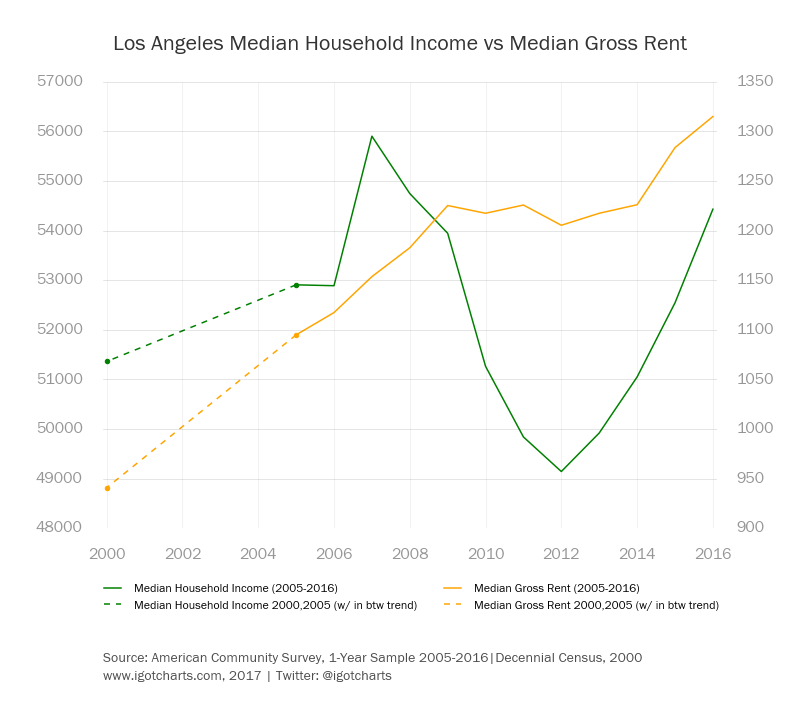

In [119]:
income_chart = charts_function_list.chart_maker('Los Angeles Median Household Income vs Median Gross Rent',title_size=22)

fig = income_chart.initial_fig_axis()

ax = income_chart.axes_set_up(fig)

linewidth=1.5

#first plots


l1 = ax.plot(rent_vs_income['Year'],rent_vs_income['Median Income 2016 Dollars'],color='green',
        linewidth=linewidth,label='Median Household Income (2005-2016)')

l2 = ax.plot(year_2000['Year'],year_2000['Median Income 2016 Dollars'],linestyle='--',color='green',
        linewidth=linewidth,label='Median Household Income 2000,2005 (w/ in btw trend)')

ax.scatter(year_2000['Year'],year_2000['Median Income 2016 Dollars'],color='green',label=None)


#secondary axis plots

ax2 = ax.twinx()
l3 = ax2.plot(rent_vs_income['Year'],rent_vs_income['Rent 2016 Dollars'],color='orange',
         linewidth=linewidth,label='Median Gross Rent (2005-2016)')

l4 = ax2.plot(year_2000['Year'],year_2000['Rent 2016 Dollars'],linestyle='--',color='orange',
         linewidth=linewidth,label='Median Gross Rent 2000,2005 (w/ in btw trend)')

ax2.scatter(year_2000['Year'],year_2000['Rent 2016 Dollars'],color='orange',label=None)


lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, bbox_to_anchor=(.5,-.1),loc=9,ncol=2)

income_chart.x_axis_setup(ax,1999.9,2016.1,2)

income_chart.tick_params_(ax,pad=20)
income_chart.tick_params_(ax2,pad=20)
income_chart.citations(ax,source='Source: American Community Survey, 1-Year Sample 2005-2016|Decennial Census, 2000',
            source_y=-0.3, chart_tag_y=-0.34, fontsize=14, color='black', alpha=0.7)